In [221]:
import pandas as pd
import pycountry_convert as pc # required to obtain regions

In [222]:
data = pd.read_csv('main_data.csv')

In [223]:
data.head()

,Unnamed: 0,country,year,protest,protesterviolence,protest_time,reasons_price,reasons_labor,reasons_policebrutality,reasons_land,...,responses_ignore,responses_other,responses_beatings,responses_arrests,responses_killings,responses_crowd_dispersal,violent_response,success,violence_both,violent_protest_time
0,13647,Afghanistan,1990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13648,Afghanistan,1991,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,13649,Afghanistan,1992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13650,Afghanistan,1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13651,Afghanistan,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Violence over time'}, xlabel='year'>

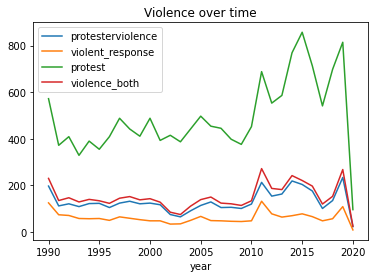

In [230]:
vot = data.sort_values('year') # violence over time
vot = vot[['year','protesterviolence','violent_response','protest','violence_both']]
vot = vot.groupby(['year']).sum()
vot.plot(title='Violence over time')

<AxesSubplot:title={'center':'Percent of violent protests over time'}, xlabel='year'>

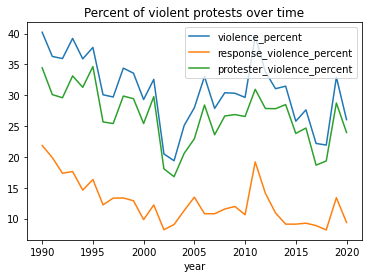

In [231]:
vot['violence_percent'] = (vot['violence_both'] / vot['protest'])*100 # percent of violent protests
vot['response_violence_percent'] = (vot['violent_response'] / vot['protest'])*100 # percent of violent response
vot['protester_violence_percent'] = (vot['protesterviolence'] / vot['protest'])*100 # percent of violent protestor
vot.plot(y=['violence_percent','response_violence_percent','protester_violence_percent'],title='Percent of violent protests over time')

In [486]:
vpc = data.sort_values('year') # violence per continent
vpc = vpc[['country','protest', 'protesterviolence','violent_response','violence_both']]

In [487]:
def update_countries(dataframe):
    # handling countries that do not exist anymore
    # approximations are okay as we are attempting to get continent information
    dataframe['country'] = dataframe['country'].replace(['United Arab Emirate'], 'United Arab Emirates')
    dataframe['country'] = dataframe['country'].replace(['USSR'], 'Russia')
    dataframe['country'] = dataframe['country'].replace(['Germany West','Germany East'], 'Germany')
    dataframe['country'] = dataframe['country'].replace(['Yugoslavia'], 'Croatia')
    dataframe['country'] = dataframe['country'].replace(['Czechoslovakia'], 'Slovakia')
    dataframe['country'] = dataframe['country'].replace(['Bosnia'], 'Bosnia and Herzegovina')
    dataframe['country'] = dataframe['country'].replace(['Serbia and Montenegro', 'Kosovo'], 'Serbia')
    dataframe['country'] = dataframe['country'].replace(['Congo Kinshasa', 'Congo Brazzaville'], 'Congo')
    # because it's unclear what continent this country is in:
    dataframe['country'] = dataframe['country'].replace(['Timor Leste','Timor-Leste','East Timor'], 'Indonesia') 

In [488]:
def get_continent(country):
    code = pc.country_name_to_country_alpha2(country, cn_name_format='default')
    continent_code = pc.country_alpha2_to_continent_code(code)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name

<AxesSubplot:title={'center':'Occurrences of violent protests (1990-2020)'}, xlabel='continent'>

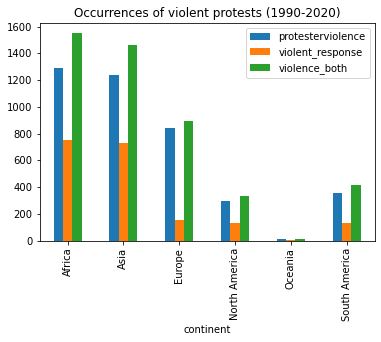

In [489]:
update_countries(vpc)
vpc['continent'] = vpc.apply(lambda row: get_continent(row.country), axis=1)
vpc = vpc.groupby(['continent']).sum()
vpc.drop(columns='protest').plot(kind='bar',title='Occurrences of violent protests (1990-2020)') # violence per continent

<AxesSubplot:title={'center':'Percent of protests that were violent'}, xlabel='continent'>

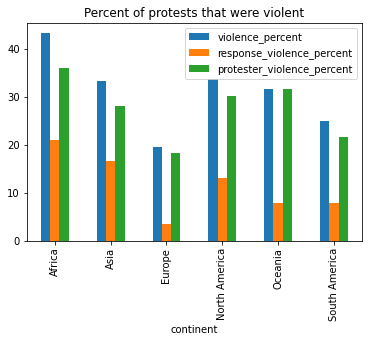

In [490]:
vpc['violence_percent'] = (vpc['violence_both'] / vpc['protest'])*100 # percent of violent protests
vpc['response_violence_percent'] = (vpc['violent_response'] / vpc['protest'])*100 # percent of violent response
vpc['protester_violence_percent'] = (vpc['protesterviolence'] / vpc['protest'])*100 # percent of violent protestor
vpc.plot(y=['violence_percent','response_violence_percent','protester_violence_percent'],kind='bar',title='Percent of protests that were violent')

In [382]:
cot = data.copy() # continents over time
cot = cot[['country', 'year', 'protest', 'protesterviolence', 'violent_response', 'violence_both']]

<AxesSubplot:title={'center':'Number of violent protests over time'}, xlabel='year'>

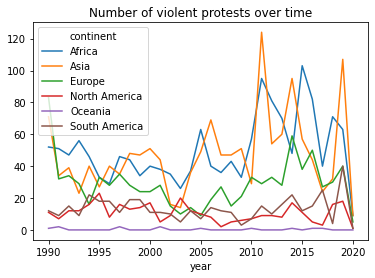

In [383]:
update_countries(cot)
cot['continent'] = cot.apply(lambda row: get_continent(row.country), axis=1)
mvc = cot.copy() # copy to use later
cot = cot.groupby(['continent','year']).sum()
cot.reset_index().pivot('year','continent','violence_both').plot(title='Number of violent protests over time') 

<AxesSubplot:title={'center':'Percent of protests that were violent over time'}, xlabel='year'>

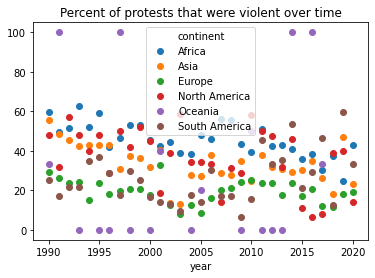

In [384]:
cot['violence_percent'] = (cot['violence_both'] / cot['protest'])*100 # percent of violent protests
cot.reset_index().pivot('year','continent','violence_percent').plot(linestyle='',marker='o',title='Percent of protests that were violent over time')

<AxesSubplot:title={'center':'Most violent countries by occurrences'}, xlabel='country'>

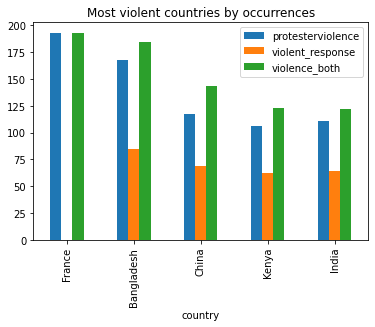

In [491]:
mvc = mvc.groupby(['country']).sum() # most violent countries
mvc = mvc.drop(columns='year')
mvc.nlargest(5,'violence_both').plot.bar(y=['protesterviolence','violent_response','violence_both'],title='Most violent countries by occurrences')

<AxesSubplot:title={'center':'Most violent countries by percent'}, xlabel='country'>

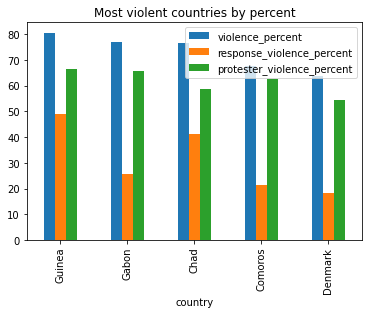

In [492]:
mvc['violence_percent'] = (mvc['violence_both'] / mvc['protest'])*100 # percent of violent protests
mvc['response_violence_percent'] = (mvc['violent_response'] / mvc['protest'])*100 # percent of violent response
mvc['protester_violence_percent'] = (mvc['protesterviolence'] / mvc['protest'])*100 # percent of violent protestor
mvc = mvc[mvc.protest > 10] # limit to countries with more than ten protests
mvc.nlargest(5,'violence_percent').plot.bar(y=['violence_percent','response_violence_percent','protester_violence_percent'],title='Most violent countries by percent')

<AxesSubplot:title={'center':'Most extreme balance of power'}, xlabel='country'>

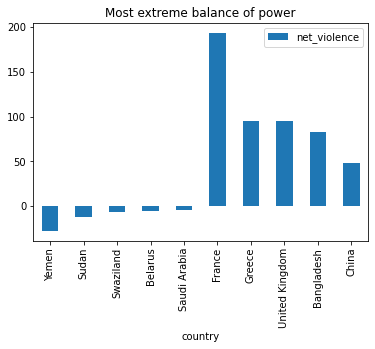

In [387]:
mvc['net_violence'] = (mvc['protesterviolence'] - mvc['violent_response'])
pd.concat([mvc.nsmallest(5,'net_violence'),mvc.nlargest(5,'net_violence')]).plot.bar(y='net_violence',title='Most extreme balance of power')

In [442]:
mbc = data.copy() # most brutal countries
mbc = mbc[['country','protest','protesterviolence','violent_response','violence_both','responses_killings']]

In [443]:
def is_unwarranted(protesterviolence, violent_response):
    if violent_response >= 1 and protesterviolence == 0:
        return 1
    return 0

<AxesSubplot:title={'center':'Countries with the most unwarranted responses'}, xlabel='country'>

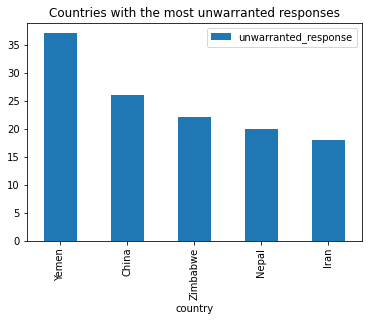

In [444]:
mbc['unwarranted_response'] = mbc.apply(lambda row:is_unwarranted(row.protesterviolence,row.violent_response),axis=1)
mbc.groupby('country').sum().nlargest(5,'unwarranted_response').plot.bar(y='unwarranted_response',title='Countries with the most unwarranted responses')

<AxesSubplot:title={'center':'Most brutal countries'}, xlabel='country'>

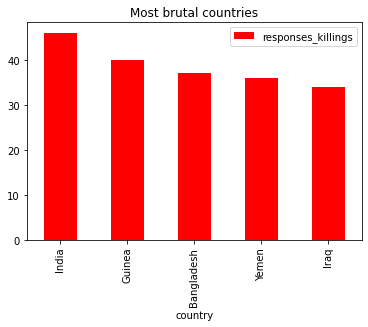

In [445]:
mbc.groupby('country').sum().nlargest(5,'responses_killings').plot.bar(y='responses_killings',title='Most brutal countries',color='red')

<AxesSubplot:title={'center':'Most brutal countries by percent'}, xlabel='country'>

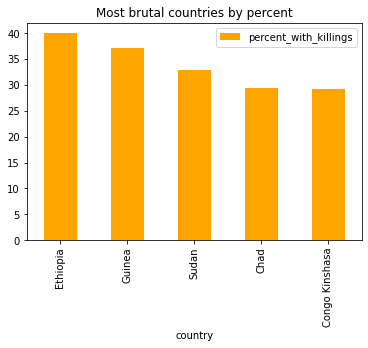

In [446]:
temp = mbc.copy()
mbc = mbc.groupby('country').sum()
mbc = mbc[mbc.protest > 10] # limit to countries with more than ten protests
mbc['percent_with_killings'] = (mbc['responses_killings'] / mbc['protest'])*100
mbc.nlargest(5,'percent_with_killings').plot.bar(y='percent_with_killings',title='Most brutal countries by percent',color='orange')

<AxesSubplot:title={'center':'Unwarranted responses by continent'}, xlabel='continent'>

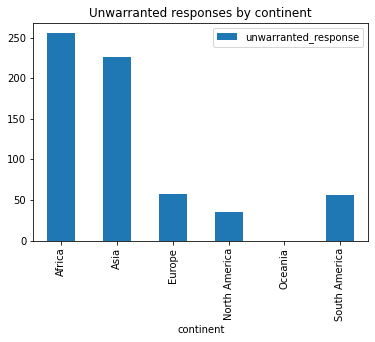

In [447]:
mbc = temp.copy()
update_countries(mbc)
mbc['continent'] = mbc.apply(lambda row: get_continent(row.country), axis=1)
mbc.groupby('continent').sum().plot.bar(y='unwarranted_response',title='Unwarranted responses by continent')

<AxesSubplot:title={'center':'Brutality by continent'}, xlabel='continent'>

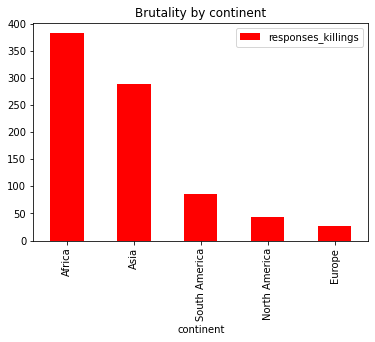

In [448]:
mbc.groupby('continent').sum().nlargest(5,'responses_killings').plot.bar(y='responses_killings',title='Brutality by continent',color='red')

<AxesSubplot:title={'center':'Percent brutality by continent'}, xlabel='continent'>

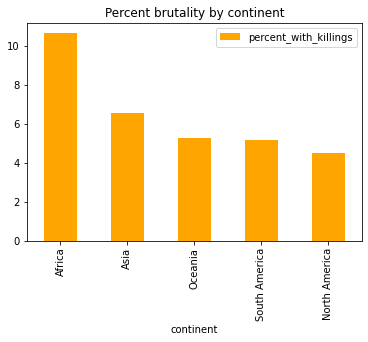

In [450]:
mbc = mbc.groupby('continent').sum()
mbc = mbc[mbc.protest > 10] # limit to countries with more than ten protests
mbc['percent_with_killings'] = (mbc['responses_killings'] / mbc['protest'])*100
mbc.nlargest(5,'percent_with_killings').plot.bar(y='percent_with_killings',title='Percent brutality by continent',color='orange')

In [458]:
bot = data.copy() # brutality over time
bot = bot[['country','year','protest','protesterviolence','violent_response','violence_both','responses_killings']]

<AxesSubplot:title={'center':'Killing response over time'}, xlabel='year'>

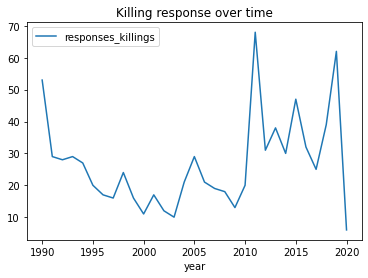

In [459]:
bot['unwarranted_response'] = bot.apply(lambda row:is_unwarranted(row.protesterviolence,row.violent_response),axis=1)
bot.groupby('year').sum().plot(y='responses_killings', title='Killing response over time')

<AxesSubplot:title={'center':'Percent killing response over time'}, xlabel='year'>

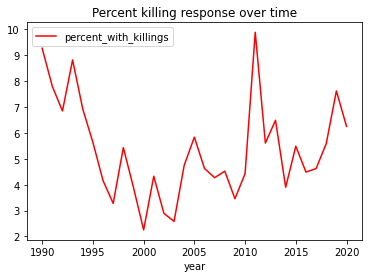

In [479]:
temp = bot.copy()
bot = bot.groupby('year').sum()
bot['percent_with_killings'] = (bot['responses_killings'] / bot['protest'])*100
bot.plot(y='percent_with_killings',title='Percent killing response over time',color='red')

<AxesSubplot:title={'center':'Protests with killings over time'}, xlabel='year'>

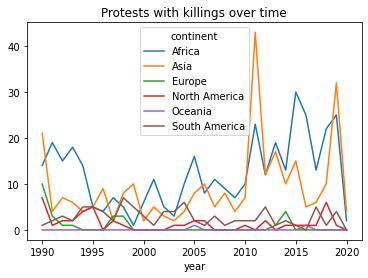

In [468]:
bot = temp.copy()
update_countries(bot)
bot['continent'] = bot.apply(lambda row: get_continent(row.country), axis=1)
bot.groupby(['continent','year']).sum().reset_index().pivot('year','continent','responses_killings').plot(title='Protests with killings over time')

<AxesSubplot:title={'center':'Percent of protests with killings'}, xlabel='year'>

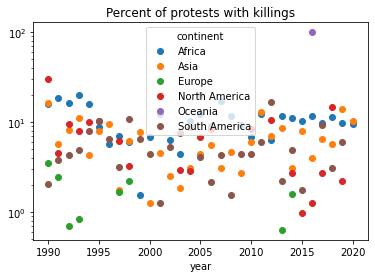

In [478]:
bot = bot.groupby(['continent','year']).sum()
bot['percent_with_killings'] = (bot['responses_killings'] / bot['protest'])*100
bot.reset_index().pivot('year','continent','percent_with_killings').plot(title='Percent of protests with killings',logy=True,linestyle='',marker='o')